Ejercicio 1

a) Implementar un Generador Congruencial Lineal (GCL) de módulo 2^32, multiplicador 1013904223, incremento de 1664525 y semilla igual a la parte entera del promedio de los números de padrón de los integrantes del grupo.
b) Modificar el GCL implementado en el punto a) para que devuelva números al azar entre 0 y 1
c) Realizar los gráficos que considere necesarios para mostrar las distribuciones de números al azar
generados en los puntos a) y b)

In [1]:
#a)
function generador(u)
    a = 1013904223;
    c = 1664525;
    m = 2^32;
    return mod((a*u+c), m)
end

generador (generic function with 1 method)

In [2]:
#Definimos una función que dado un u0, genere n números
#Nota: Julia (Igual que python) no soporta una optimización de recursión de cola
#Por lo tanto esto no puede generar mas números de las veces que la función se puede llamar en el stack
#Hay que hacer uan versión iterativa sino
function generar_numeros_aleatorios(u, n)
    if n == 1
        return generador( u )
    else
        u = generador( u )
        return vcat(u, generar_numeros_aleatorios(u, n - 1))
    end
end

generar_numeros_aleatorios (generic function with 1 method)

In [3]:
#Probamos
u0 = 100972 + 96890 + 98867 # suma padrones
generar_numeros_aleatorios(u0, 5)

5-element Array{Int64,1}:
  918700884
 1446059577
 4102142004
  879631705
 1930413332

b ) Para que genere numeros al azar entre 0 y 1, tengo que mapear todos los numeros posibles (m) entre 0 y 1

In [4]:
function transformar_a_0_1(numeros)
    m = 2^32;
    map(n -> n / m, numeros)
end

transformar_a_0_1 (generic function with 1 method)

In [5]:
#Y la uso para transformar los valores (se puede hacer función de función)

transformar_a_0_1(generar_numeros_aleatorios(u0, 5))

5-element Array{Float64,1}:
 0.21390171814709902
 0.33668698207475245
 0.9551043631508946
 0.20480521605350077
 0.4494593786075711

c) Para mostrar visualmente que los números son al azar, vamos a generar 10000 entre 0 y 1, y ponerlos en un histograma

In [6]:
#Instalamos la biblioteca para gráficar, solo hace falta una vez
#Puede demorar en descargar las cosas
#Borrar el igual si es necesario instalar y correr este cuadro
#=
import Pkg
Pkg.add("Plots")
Pkg.add("Distributions")
=#


In [7]:
using Plots # using plots puede demorar un ratito la primera vez, después funciona bien rápido
using Distributions

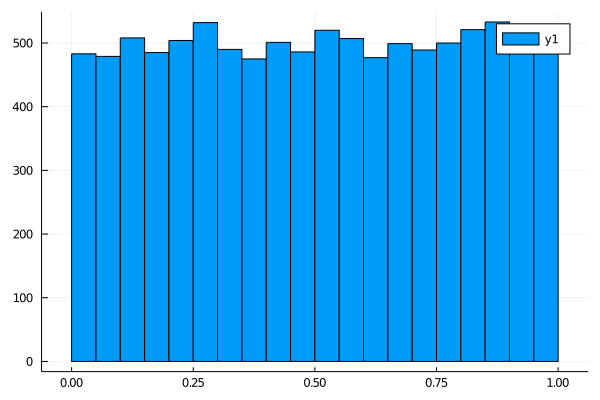

In [8]:
histogram(transformar_a_0_1(generar_numeros_aleatorios(u0, 10000)))

Podemos ver con el histograma que la distribución se parece muccho a una uniforme